# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/Restaurant_revenue.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe 

In [3]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset

In [4]:
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used

In [5]:
data.dtypes

Number_of_Customers            int64
Menu_Price                   float64
Marketing_Spend              float64
Cuisine_Type                  object
Average_Customer_Spending    float64
Promotions                     int64
Reviews                        int64
Monthly_Revenue              float64
dtype: object

# As per the dataset Cuisine Type and Promotions are not deemed to be set as features as they have either Yes or No as values, else non-numerical values.. So it is better to drop them from the dataframe

In [6]:
# Drop additional columns
columns_to_drop = ['Cuisine_Type', 'Promotions']
x_selected = data.drop(columns=columns_to_drop, axis=1)
x_selected

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,45,350.912040
1,24,40.020077,4.577892,17.952562,36,221.319091
2,81,41.981485,4.652911,22.600420,91,326.529763
3,70,43.005307,4.416053,18.984098,59,348.190573
4,30,17.456199,3.475052,12.766143,30,185.009121
...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,40,249.312034
996,31,20.615496,5.822885,17.040990,57,110.228767
997,69,17.110656,4.141898,44.649315,55,312.212552
998,73,37.664722,3.046556,27.767358,23,272.482204


# It is advisable to first find the correlation between features and target.. Higher the correlation coefficient better the Linear Regression analysis

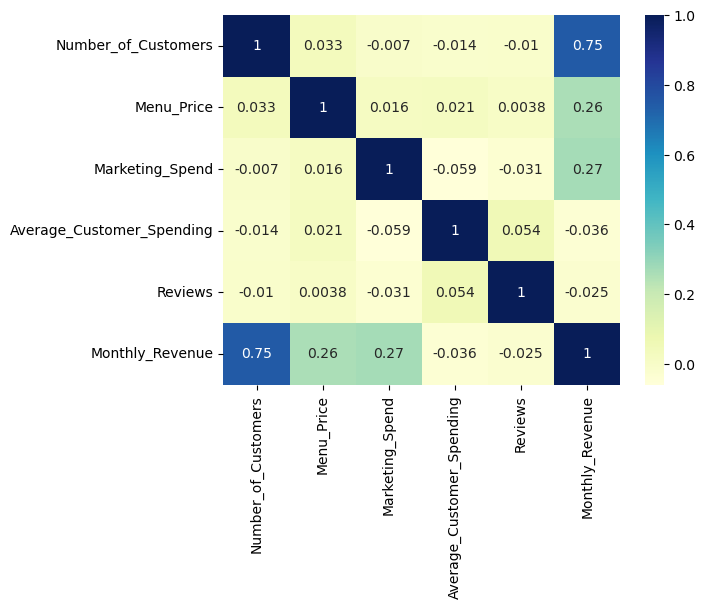

In [7]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

sns.heatmap(x_selected.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Using the scatter plot between No. of Customers and Monthly Review to check whether Linear Regression is feasible.. No. of Customers and Monthly Review have a correlation of 75 %

<Axes: xlabel='Number_of_Customers', ylabel='Monthly_Revenue'>

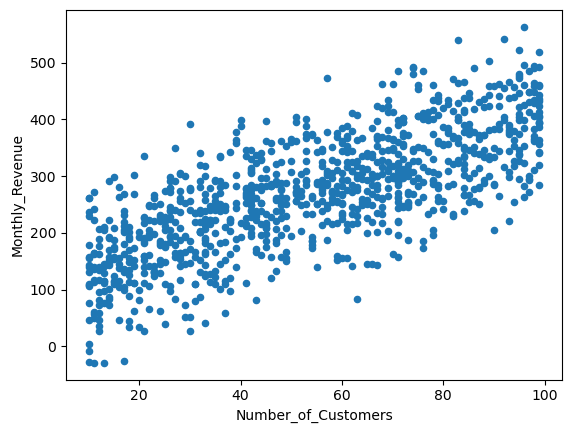

In [8]:
# Visualise the relationship between the features and the response using scatterplots
data.plot(x='Number_of_Customers',y='Monthly_Revenue',kind='scatter')

# Here 'x' represents the independent variable (feature) and 'y' represents the dependent variable (target)

In [9]:
x = data['Number_of_Customers']
y = data.iloc[:, -1].values

# Since only one feature is being used so the size has to be increased by one more dimension using 'reshape'

In [10]:
# Convert 1D array to 2D array
x = x.values.reshape(-1, 1)

In [11]:
x.shape

(1000, 1)

## Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 95:05 where 95 represents training set and 5 testing/validating set

In [12]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.05, random_state = 0)  

# To check the dimensions of each training and testing set

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(950, 1)
(950,)
(50, 1)
(50,)


# Importing LinearRegression from 'sklearn' library and using the object to train the model on training set

In [14]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(x_train, y_train)

LinearRegression()

# One of the most important in Linear Regression model is the equation of line, i.e., y = mx + c, where m is the slope of the line and c is intercept on the y - axis

In [15]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

111.2684096502525
[2.95533436]


# The equation of line hence is :-

# y = 2.95533436 * x + 111.2684096502525

### where y is Monthly Revenue and x is No of Customers (training set)

## Using the scatter plot we plot the points of Training Data and predicted line, i.e., y = mx + c

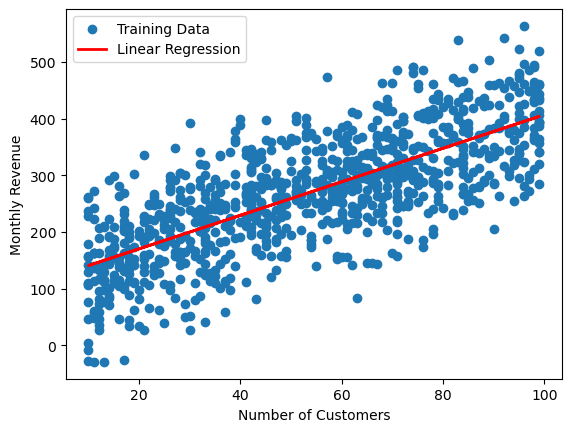

In [16]:
# Scatter plot of the training data
plt.scatter(x_train, y_train, label='Training Data')

# Plotting the regression line
plt.plot(x_train, lr.predict(x_train), color='red', linewidth=2, label='Linear Regression')   # y = mx + c

# Labeling the axes
plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


# Predict the set of values on x_test and x_train and store in corresponding variables

In [17]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# To verify the accuracy of the model we use Mean Squared Error and R² value which gives the goodness of fit, i.e., how close values are to the line and how much deviation of predicted from actual

In [18]:
# The model accuracy of test data
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)
print('Mean Squared Error : ', mse)
print('R² Value : ', r_squared)


Mean Squared Error :  3404.3791884090633
R² Value :  0.639874765151927


## Mean Squared Error is 3404.38 

# R² value is 63.987 % (values are approx 64 % near to the line)

In [19]:
x = data['Number_of_Customers']
y = data.iloc[:, -1].values

# Performing Gradient Descent to find the best fitted line so as to better the obtained R² value to its optimal value, for this we use the Dm which indicates the direction and magnitude of the steepest increase in the cost with respect to changing slope and Dc with respect to intercept

In [20]:
# For gradient descent we will start with assumptions to get
m = 100
c = 100

L = 0.0001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X, i.e., No. of Customers

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
m

3.0777639792164257

In [21]:
c

102.96306121649167

# Visualizing the graph so as to obtain the difference between previous predicted line and newly predicted line... They are close to each other

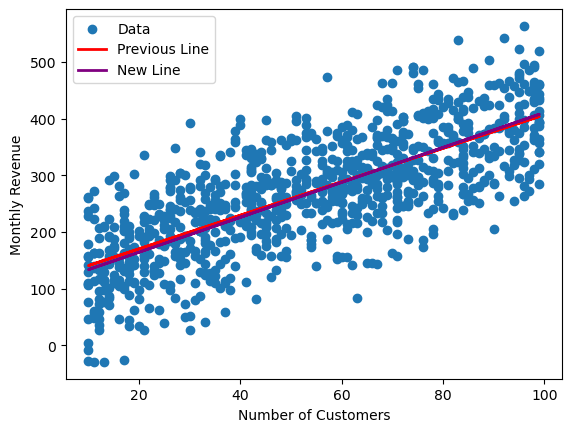

In [22]:
Y_pred_train = m*x_train + c
Y_pred_test = m*x_test + c

# Scatter plot of the training data
plt.scatter(x_train, y_train, label='Data')

# Plotting the regression line
plt.plot(x_train, lr.predict(x_train), color='red', linewidth=2, label='Previous Line')   # y = mx + c
plt.plot(x_train, Y_pred_train, color='purple', linewidth=2, label='New Line')  # regression line

# The two lines plotted are too close to each other, so Linear Regression produced nearly the closest line to the best-fit

# Labeling the axes
plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

## The equation of line hence is :-

# y = 3.0777639792164257 * x + 102.96306121649167

### where y is Monthly Revenue and x is No of Customers (training set)

## Mean Squared Error is 3352.91 

# R² value is 65.252 % (values are approx 65 % near to the line)

In [23]:
# The model accuracy of test data
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, Y_pred_test)
r_squared = r2_score(y_test, Y_pred_test)
print('Mean Squared Error : ', mse)
print('R² Value : ', r_squared)

Mean Squared Error :  3473.90988365266
R² Value :  0.6325196038822885


# Final Interpretation

The Revenue dataset which contains 1000 rows and 6 columns is used for Linear Regression model. The dataset is not used as a whole and only specific features are interlinked to the target values. Since no empty or null values are present in the dataset, and Correlation between feature and target is 75 %. Based on 95:05 validating split, R² value is 63.987 % and Mean Squared Error is 3404.38. From the line y = mx + c, we get the value of slope, i.e., m = 2.95533436 and value of intercept on y-axis, i.e., c = 111.2684096502525. The model has quite a few uncertainities but still it is decent to predict the values.

Upon using Gradient Descent optimization, we get the value of slope, i.e., m = 3.0777639792164257 and value of intercept on y-axis, i.e., c = 102.96306121649167. The ultimate R² value is 65.252 % which is the best-fitted value for this dataset.